# Uso de POWMES

### Cargamos las bibliotecas que necesitamos

In [1]:
import glob
import math
import sys
import os

import pandas as pd
import numpy as np

#%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('classic')
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

from scipy import interpolate
import math

from IPython.display import display

### i) Espectro de potencias en $z=0$ reconstruido por POWMES. 
Modo: $$k = WN*\frac{2\pi}{L} [hMpc^{-1}]$$
Espectro:
$$P(k)=(P_{debiased}-WNoise/N_{part})*L^3[h^{-3}Mpc^3]$$

In [2]:
Npart = 128**3         #numbero de particulas
Lbox  = 128.           #largo de la caja

z0_file = '/home/ealmaraz/software/powmes/example/output/lcdm/bfbdev3/part128_lbox128/output_00011/powspec.dat'

z0_df = pd.read_table(z0_file,sep="\s+",skiprows=1,header=None)  
z0_df.columns = ['wave number','# SIM','rough P(k)','debiased P(k)','shot noise','SE']
#Expresamos el modo en h Mpc^{-1}    
z0_df['k [h Mpc^{-1}]'] = z0_df['wave number']*2*math.pi/Lbox
#Expresamos el espectro en [h^{-1}Mpc]^3 
z0_df['P(k) [h^{-1} Mpc]^3'] = (z0_df['debiased P(k)']-z0_df['shot noise']/Npart)*Lbox**3
#Nos quedamos con dos columnas: k - P(k)
z0_df=z0_df[['k [h Mpc^{-1}]','P(k) [h^{-1} Mpc]^3']]

z0_df

,k [h Mpc^{-1}],P(k) [h^{-1} Mpc]^3
0,0.049087,10135.277919
1,0.098175,5945.553381
2,0.147262,4071.300692
3,0.196350,2097.427524
4,0.245437,2030.483136
5,0.294524,1487.394051
6,0.343612,1335.309682
7,0.392699,1150.590679
8,0.441786,1088.478030
9,0.490874,896.589123


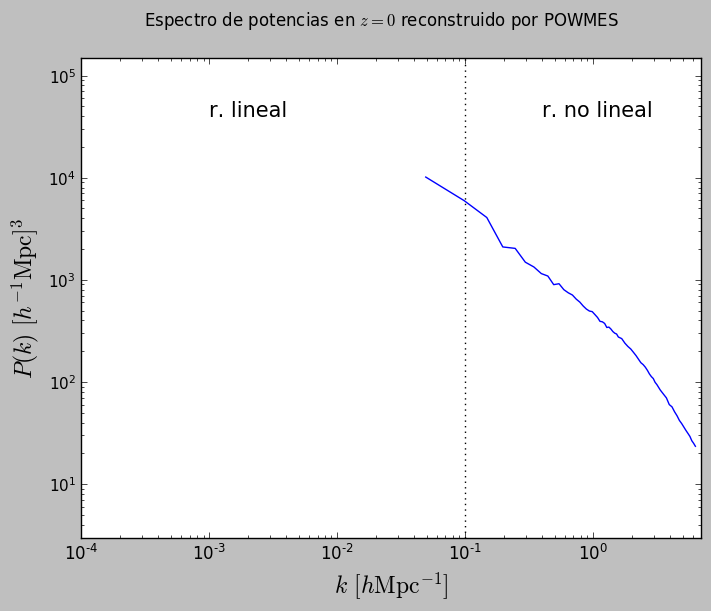

In [3]:
fig = plt.figure()
fig.suptitle('Espectro de potencias en $z=0$ reconstruido por POWMES',fontsize=12)
plt.plot(z0_df['k [h Mpc^{-1}]'],z0_df['P(k) [h^{-1} Mpc]^3'],'b',label='$N_{part}=128^3,L_{box}=128h^{-1}Mpc$',linewidth=1)

plt.xlabel('$k$ $[h\mathrm{ Mpc}^{-1}]$',fontsize=17)
plt.xscale('log')
plt.xlim([1.e-4,7])

plt.ylabel('$P(k)$ $[h^{-1}\mathrm{ Mpc}]^{3}$',fontsize=17)
plt.ylim([3.e0,1.5e5])
plt.yscale('log')
plt.yticks(fontsize=11)

plt.axvline(0.1,color='k',linestyle=':',linewidth=1)
plt.text(1.e-3,4.e4,r'r. lineal',fontsize=15,color='black')
plt.text(4.e-1,4.e4,r'r. no lineal',fontsize=15,color='black')

### ii) Espectro lineal vs espectro no lineal

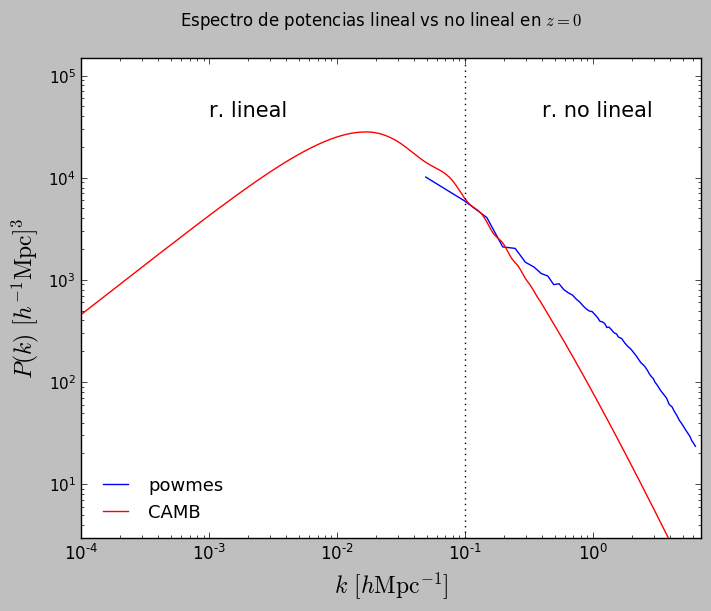

In [4]:
Npart = 128**3         #number of particles
Lbox  = 128.           #length of the box

#POWMES
powmes_file = '/home/ealmaraz/software/powmes/example/output/lcdm/bfbdev3/part128_lbox128/output_00011/powspec.dat'
powmes_df = pd.read_table(powmes_file,sep="\s+",skiprows=1,header=None)  
powmes_df.columns = ['wave number','# SIM','rough P(k)','debiased P(k)','shot noise','SE']
#Expresamos el modo en h Mpc^{-1}
powmes_df['k [h Mpc^{-1}]'] = powmes_df['wave number']*2*math.pi/Lbox
#Expresamos el espectro en [h^{-1}Mpc]^3 
powmes_df['P(k) [h^{-1} Mpc]^3'] = (powmes_df['debiased P(k)']-powmes_df['shot noise']/Npart)*Lbox**3
#Nos quedamos con dos columnas: k - P(k)
powmes_df=powmes_df[['k [h Mpc^{-1}]','P(k) [h^{-1} Mpc]^3']]

#CAMB
camb_pk = np.loadtxt('/home/ealmaraz/software/camb/lcdm/v2/resultados/bfbdev3/lcdmv2_bfbdev3_matterpower_z0.dat')

fig = plt.figure()
fig.suptitle('Espectro de potencias lineal vs no lineal en $z=0$',fontsize=12)
plt.plot(powmes_df['k [h Mpc^{-1}]'],powmes_df['P(k) [h^{-1} Mpc]^3'],'b',label='powmes',linewidth=1)
plt.plot(camb_pk[:,0],camb_pk[:,1],'r',label='CAMB',linewidth=1)


plt.xlabel('$k$ $[h\mathrm{ Mpc}^{-1}]$',fontsize=17)
plt.xscale('log')
plt.xlim([1.e-4,7])

plt.ylabel('$P(k)$ $[h^{-1}\mathrm{ Mpc}]^{3}$',fontsize=17)
plt.ylim([3.e0,1.5e5])
plt.yscale('log')
plt.yticks(fontsize=11)

plt.axvline(0.1,color='k',linestyle=':',linewidth=1)
plt.text(1.e-3,4.e4,r'r. lineal',fontsize=15,color='black')
plt.text(4.e-1,4.e4,r'r. no lineal',fontsize=15,color='black')
plt.legend(loc='lower left',prop={'size':13},frameon=False)

### iii) Resolución

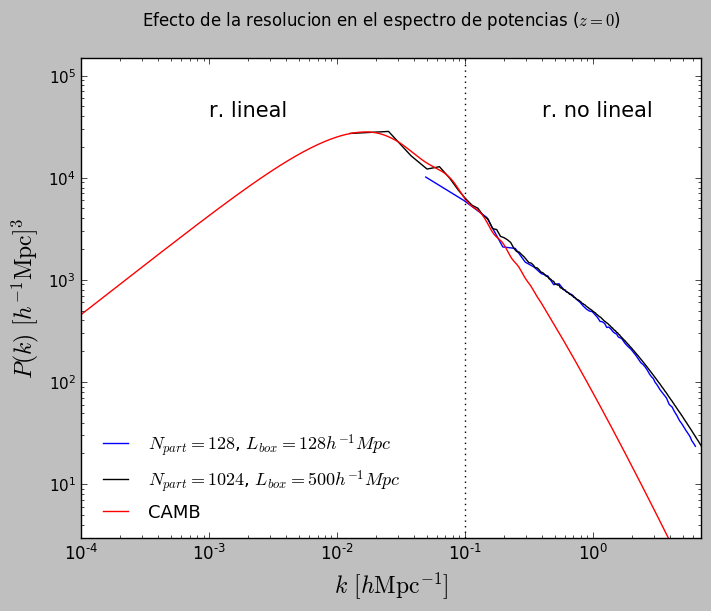

In [5]:
Npart_128 = 128**3         #numero de particulas
Lbox_128  = 128.           #largo de la caja

Npart_1024 = 1024**3       #numero de particulas
Lbox_500  = 500.           #largo de la caja

#POWMES
p128_file = '/home/ealmaraz/software/powmes/example/output/lcdm/bfbdev3/part128_lbox128/output_00011/powspec.dat'
p128_df = pd.read_table(p128_file,sep="\s+",skiprows=1,header=None)  
p128_df.columns = ['wave number','# SIM','rough P(k)','debiased P(k)','shot noise','SE']
#Expresamos el modo en h Mpc^{-1}
p128_df['k [h Mpc^{-1}]'] = p128_df['wave number']*2*math.pi/Lbox_128
#Expresamos el espectro en [h^{-1}Mpc]^3 
p128_df['P(k) [h^{-1} Mpc]^3'] = (p128_df['debiased P(k)']-p128_df['shot noise']/Npart_128)*Lbox_128**3
#Nos quedamos con dos columnas: k - P(k)
p128_df=p128_df[['k [h Mpc^{-1}]','P(k) [h^{-1} Mpc]^3']]


p1024_file = '/home/ealmaraz/software/powmes/lcdm/bfbdev3/part1024_lbox500/r_00001/output_00011/powspec.dat'
p1024_df = pd.read_table(p1024_file,sep="\s+",skiprows=1,header=None)  
p1024_df.columns = ['wave number','# SIM','rough P(k)','debiased P(k)','shot noise','SE']
#Expresamos el modo en h Mpc^{-1}
p1024_df['k [h Mpc^{-1}]'] = p1024_df['wave number']*2*math.pi/Lbox_500
#Expresamos el espectro en [h^{-1}Mpc]^3 
p1024_df['P(k) [h^{-1} Mpc]^3'] = (p1024_df['debiased P(k)']-p1024_df['shot noise']/Npart_1024)*Lbox_500**3
#Nos quedamos con dos columnas: k - P(k)
p1024_df=p1024_df[['k [h Mpc^{-1}]','P(k) [h^{-1} Mpc]^3']]


#CAMB
camb_pk = np.loadtxt('/home/ealmaraz/software/camb/lcdm/v2/resultados/bfbdev3/lcdmv2_bfbdev3_matterpower_z0.dat')

fig = plt.figure()
fig.suptitle('Efecto de la resolucion en el espectro de potencias ($z=0$)',fontsize=12)
plt.plot(p128_df['k [h Mpc^{-1}]'],p128_df['P(k) [h^{-1} Mpc]^3'],'b',label='$N_{part}=128$, $L_{box}=128h^{-1}Mpc$',linewidth=1)
plt.plot(p1024_df['k [h Mpc^{-1}]'],p1024_df['P(k) [h^{-1} Mpc]^3'],'k',label='$N_{part}=1024$, $L_{box}=500h^{-1}Mpc$',linewidth=1)
plt.plot(camb_pk[:,0],camb_pk[:,1],'r',label='CAMB',linewidth=1)


plt.xlabel('$k$ $[h\mathrm{ Mpc}^{-1}]$',fontsize=17)
plt.xscale('log')
plt.xlim([1.e-4,7])

plt.ylabel('$P(k)$ $[h^{-1}\mathrm{ Mpc}]^{3}$',fontsize=17)
plt.ylim([3.e0,1.5e5])
plt.yscale('log')
plt.yticks(fontsize=11)

plt.axvline(0.1,color='k',linestyle=':',linewidth=1)
plt.text(1.e-3,4.e4,r'r. lineal',fontsize=15,color='black')
plt.text(4.e-1,4.e4,r'r. no lineal',fontsize=15,color='black')
plt.legend(loc='lower left',prop={'size':13},frameon=False)

### iv) Evolución de la dinámica no lineal

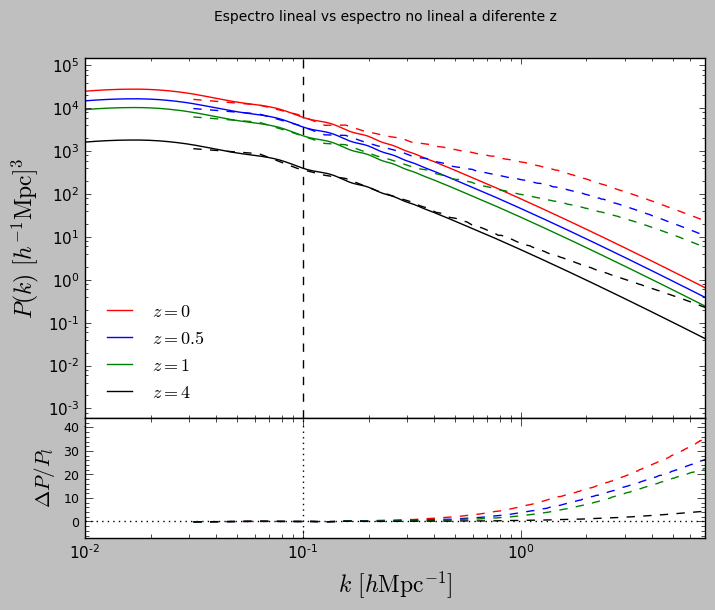

In [6]:
Npart = 512**3         #numero de particulas
Lbox  = 200.           #largo de la caja

camb_1 = np.loadtxt('/home/ealmaraz/software/camb/lcdm/v2/resultados/bfbdev3/lcdmv2_bfbdev3_matterpower_z0.dat')
camb_2 = np.loadtxt('/home/ealmaraz/software/camb/lcdm/v2/resultados/bfbdev3/lcdmv2_bfbdev3_matterpower_z0p5.dat')
camb_3 = np.loadtxt('/home/ealmaraz/software/camb/lcdm/v2/resultados/bfbdev3/lcdmv2_bfbdev3_matterpower_z1.dat')
camb_4 = np.loadtxt('/home/ealmaraz/software/camb/lcdm/v2/resultados/bfbdev3/lcdmv2_bfbdev3_matterpower_z4.dat')


powmes_1 = np.loadtxt('/home/ealmaraz/software/powmes/lcdm/bfbdev3/part512_lbox200/r_00001/output_00015/powspec.dat')
powmes_2 = np.loadtxt('/home/ealmaraz/software/powmes/lcdm/bfbdev3/part512_lbox200/r_00001/output_00010/powspec.dat')
powmes_3 = np.loadtxt('/home/ealmaraz/software/powmes/lcdm/bfbdev3/part512_lbox200/r_00001/output_00005/powspec.dat')
powmes_4 = np.loadtxt('/home/ealmaraz/software/powmes/lcdm/bfbdev3/part512_lbox200/r_00001/output_00002/powspec.dat')

kpowmes_1 = powmes_1[1:,0]*2*math.pi/Lbox;  pkpowmes_1 = (powmes_1[1:,3]-powmes_1[1:,4]/Npart)*Lbox**3
kpowmes_2 = powmes_2[1:,0]*2*math.pi/Lbox;  pkpowmes_2 = (powmes_2[1:,3]-powmes_2[1:,4]/Npart)*Lbox**3
kpowmes_3 = powmes_3[1:,0]*2*math.pi/Lbox;  pkpowmes_3 = (powmes_3[1:,3]-powmes_3[1:,4]/Npart)*Lbox**3
kpowmes_4 = powmes_4[1:,0]*2*math.pi/Lbox;  pkpowmes_4 = (powmes_4[1:,3]-powmes_4[1:,4]/Npart)*Lbox**3


#Funciones interpoladoras de los espectros
fcamb_1 = interpolate.interp1d(camb_1[:,0],camb_1[:,1]); fcamb_2 = interpolate.interp1d(camb_2[:,0],camb_2[:,1])  
fcamb_3 = interpolate.interp1d(camb_3[:,0],camb_3[:,1]); fcamb_4 = interpolate.interp1d(camb_4[:,0],camb_4[:,1])  

fpowmes_1 = interpolate.interp1d(kpowmes_1,pkpowmes_1); fpowmes_2 = interpolate.interp1d(kpowmes_2,pkpowmes_2)
fpowmes_3 = interpolate.interp1d(kpowmes_3,pkpowmes_3); fpowmes_4 = interpolate.interp1d(kpowmes_4,pkpowmes_4)

#Comparacion (diferencia relativa respecto al espectro lineal)
k  = np.arange(2*math.pi/Lbox,camb_1[606,0],0.001)
Q1 = np.zeros(len(k)); Q2 = np.zeros(len(k)); Q3 = np.zeros(len(k)); Q4 = np.zeros(len(k))

for i in range(0,len(k)):
    Q1[i] = (fpowmes_1(k[i])-fcamb_1(k[i]))/fcamb_1(k[i])
    Q2[i] = (fpowmes_2(k[i])-fcamb_2(k[i]))/fcamb_2(k[i])
    Q3[i] = (fpowmes_3(k[i])-fcamb_3(k[i]))/fcamb_3(k[i])
    Q4[i] = (fpowmes_4(k[i])-fcamb_4(k[i]))/fcamb_4(k[i])


fig = plt.figure()
#panel superior
fig.suptitle('Espectro lineal vs espectro no lineal a diferente z',fontsize=10)
plt.subplots_adjust(hspace=0.001)
ax1 = plt.subplot2grid((4,1), (0,0), rowspan=3)
plt.axvline(0.1,color='k',linestyle='--',linewidth=1)

plt.plot(camb_1[:,0],camb_1[:,1],'r',label='$z=0$',linewidth=1)
plt.plot(camb_2[:,0],camb_2[:,1],'b',label='$z=0.5$',linewidth=1)
plt.plot(camb_3[:,0],camb_3[:,1],'g',label='$z=1$',linewidth=1)
plt.plot(camb_4[:,0],camb_4[:,1],'k',label='$z=4$',linewidth=1)


plt.plot(kpowmes_1,pkpowmes_1,'--r',linewidth=1)
plt.plot(kpowmes_2,pkpowmes_2,'--b',linewidth=1)
plt.plot(kpowmes_3,pkpowmes_3,'--g',linewidth=1)
plt.plot(kpowmes_4,pkpowmes_4,'--k',linewidth=1)


plt.xscale('log')
plt.xlim([1.e-2,7])
plt.xticks(fontsize=0)

plt.ylabel('$P(k)$ $[h^{-1}\mathrm{ Mpc}]^{3}$',fontsize=17)
plt.yscale('log')
plt.ylim([6.e-4,1.5e5])
plt.yticks(fontsize=11)

plt.legend(loc='best',prop={'size':13},frameon=False)

#panel inferior
ax2 = plt.subplot2grid((4,1), (3,0), rowspan=1)
plt.axhline(0,color='k',linestyle=':',linewidth=1)
plt.axvline(0.1,color='k',linestyle=':',linewidth=1)

plt.plot(k,Q1,'--r',linewidth=1)
plt.plot(k,Q2,'--b',linewidth=1)
plt.plot(k,Q3,'--g',linewidth=1)
plt.plot(k,Q4,'--k',linewidth=1)

plt.xlabel('$k$ $[h\mathrm{ Mpc}^{-1}]$',fontsize=17)
plt.xscale('log')
plt.xlim([1.e-2,7])
plt.xticks(fontsize=11)

plt.ylabel('$\Delta P/P_l$',fontsize=15)
plt.ylim([-7,44])
plt.yticks(fontsize=9)
minorLocatorY = AutoMinorLocator()
ax2.yaxis.set_minor_locator(minorLocatorY)
plt.tick_params(which='major', length=6)
plt.tick_params(which='minor', length=3, color='black')